# Machine Learning Tutorial - Linear Regression (KDNuggets)

Følger guide: https://www.kdnuggets.com/2019/03/beginners-guide-linear-regression-python-scikit-learn.html

Kunne også undersøge: sepal-length vs petal_length (eller andre) 

Forsøg at få det meste data plottet med seaborn 

In [1]:
%matplotlib inline
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

sns.set_palette('husl')
sns.set_style("darkgrid")

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=columns)

In [3]:
dataset.shape

(150, 5)

In [4]:
dataset.head(10)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
dataset.tail(10)

,sepal-length,sepal-width,petal-length,petal-width,class
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Sammenligner variabler med scatterplot-matriks**

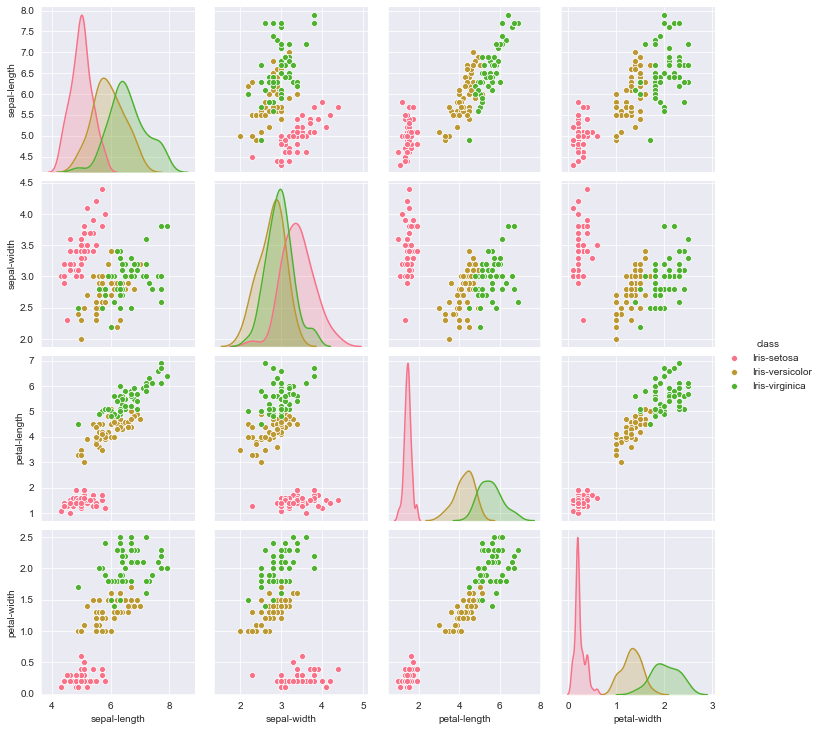

In [7]:
sns.pairplot(dataset, hue='class')
plt.show()

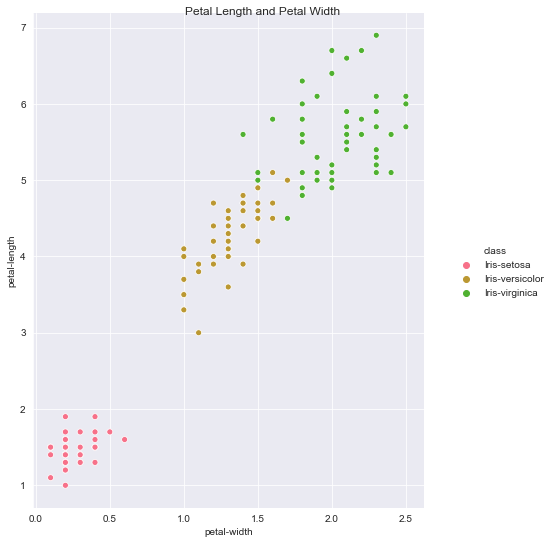

In [8]:
g = sns.relplot(x="petal-width", y="petal-length", hue="class", data=dataset)
g.fig.suptitle("Petal Length and Petal Width")
g.fig.set_size_inches(8,8)
plt.show()

**Checking the average petal length**

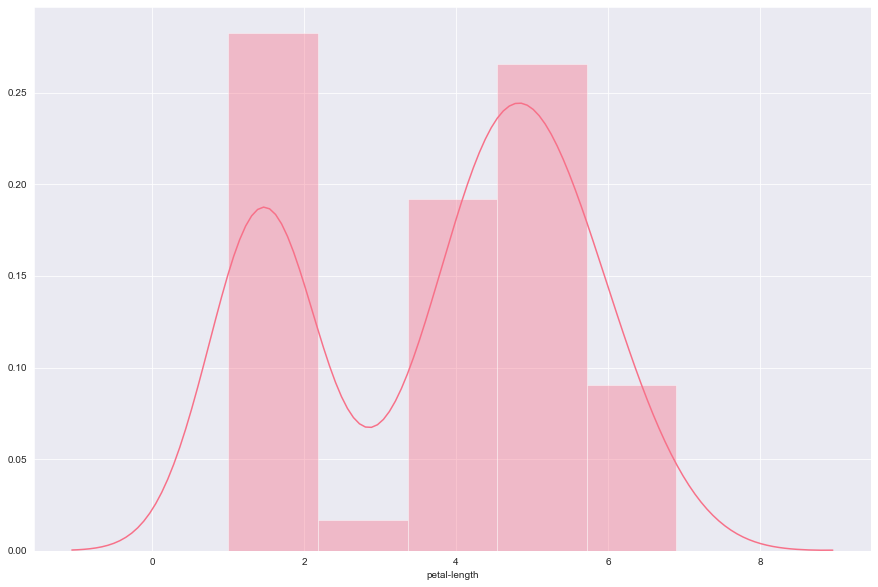

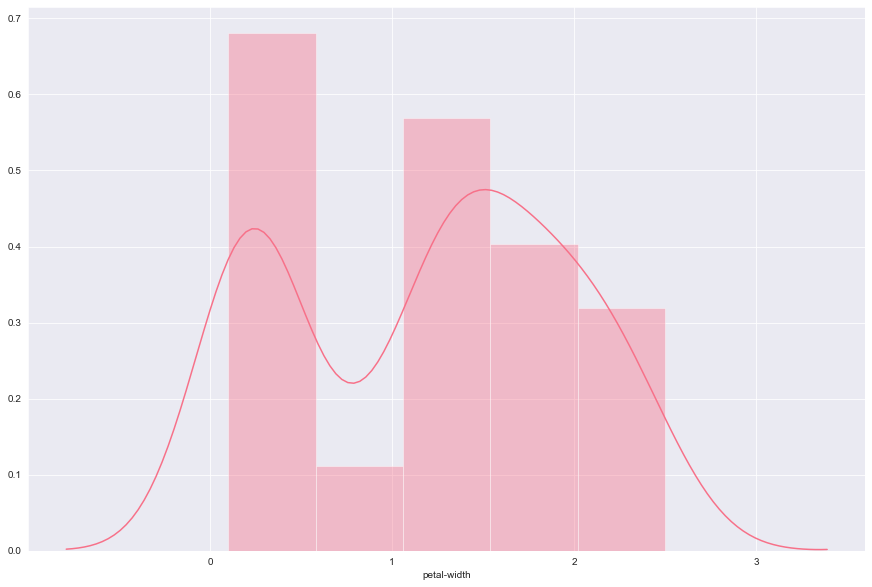

In [20]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(dataset['petal-length'])
plt.show()

plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(dataset['petal-width'])
plt.show()

In [10]:
X = dataset['petal-width'].values.reshape(-1,1)
y = dataset['petal-length'].values.reshape(-1,1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

**Printer de bedste A- og B-værdier (intercept & slope)**

In [13]:
#Intercept (A)
print(regressor.intercept_)
#Slope (B)
print(regressor.coef_)

[1.07680888]
[[2.22534146]]


**Anvender test-data til at forudsige, hvor nøjagtig vores algoritme forudsiger procentvist**

In [14]:
y_pred = regressor.predict(X_test)

**Comparing X_test with predicted values**

In [15]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,5.1,6.417628
1,4.0,3.302150
2,1.4,1.521877
3,6.3,5.082424
4,1.5,1.521877
5,6.0,6.640163
6,1.3,1.744411
7,4.7,4.414821
8,4.8,4.192287
9,4.0,3.969753


**Visualization of comparison between predicted and actual**

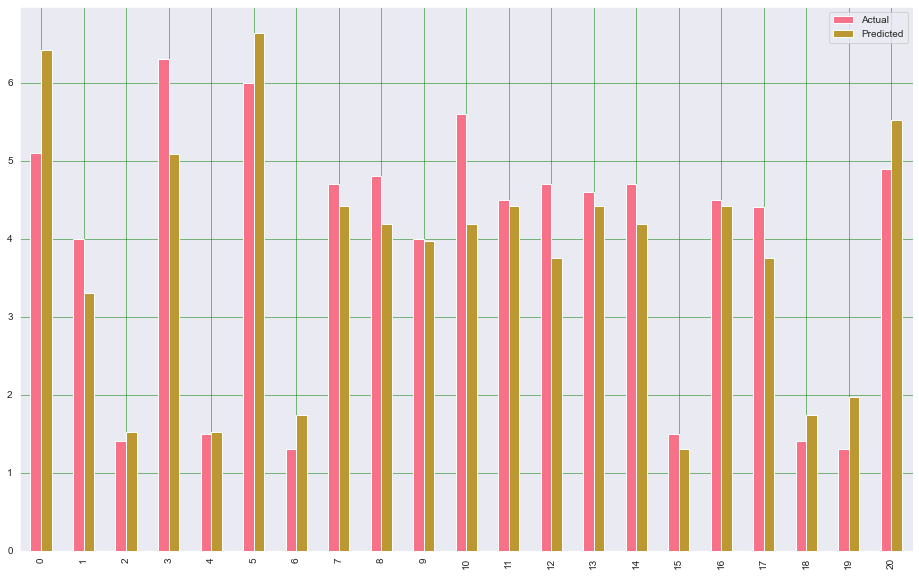

In [16]:
df1 = df.head(21)
df1.plot(kind='bar', figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

**Plotting our straight line with test data**

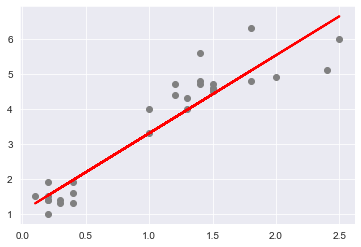

In [17]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

**Calculate error (MAE, MSE, RMSE)**

In [18]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  0.4418773751912832
Mean Squared Error:  0.3388275129172126
Root Mean Squared Error:  0.5820889218300006
